In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.basicConfig(level=logging.WARN)

import warnings
warnings.filterwarnings('ignore')

import pickle

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline

from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,f_classif,VarianceThreshold

from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.metrics import auc,roc_curve,roc_auc_score

import mlflow
import mlflow.sklearn
from urllib.parse import urlparse

from imblearn.over_sampling import SMOTE,SMOTENC,RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
df = pd.read_csv("DataSet/drug200.csv")

df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [3]:
X = df.drop(['Drug'],axis=1)
y = df['Drug']

In [4]:
y.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
y.replace({'DrugY':0, 'drugC':1, 'drugX':2, 'drugA':3, 'drugB':4},inplace=True)

In [6]:
x_train ,x_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [7]:
print(y_train.value_counts(normalize=True))

print(y_test.value_counts(normalize=True))

Drug
0    0.45625
2    0.26875
3    0.11250
1    0.08125
4    0.08125
Name: proportion, dtype: float64
Drug
0    0.450
2    0.275
3    0.125
4    0.075
1    0.075
Name: proportion, dtype: float64


In [26]:
x_train['Na_to_K'].min()

6.683

In [9]:
lbe = LabelEncoder()

for col in x_train.columns:
    # Check if the data type is object (categorical)
    if x_train[col].dtype == 'object':
        # Fit the LabelEncoder on the unique values in the column
        lbe.fit(x_train[col])
        
        # Transform both x_train and x_test using the fitted LabelEncoder
        x_train[col] = lbe.transform(x_train[col])
        x_test[col] = lbe.transform(x_test[col])

In [10]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
125,19,0,0,1,25.969
21,63,1,2,0,25.917
47,68,1,1,0,10.291
11,34,0,0,1,19.199
81,64,1,2,0,7.761
...,...,...,...,...,...
119,61,0,0,0,25.475
26,31,1,0,0,30.366
60,38,0,1,1,29.875
173,41,0,1,1,18.739


In [11]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
188,65,1,0,1,34.997
79,32,0,1,1,10.840
74,31,1,0,1,17.069
190,58,1,0,0,18.991
42,50,1,2,1,15.790
129,32,0,2,0,7.477
132,49,1,1,1,13.598
87,69,1,1,0,15.478
67,17,1,2,1,10.832
14,50,0,2,0,12.703


In [12]:
corr_x = x_train.corr()

<Axes: >

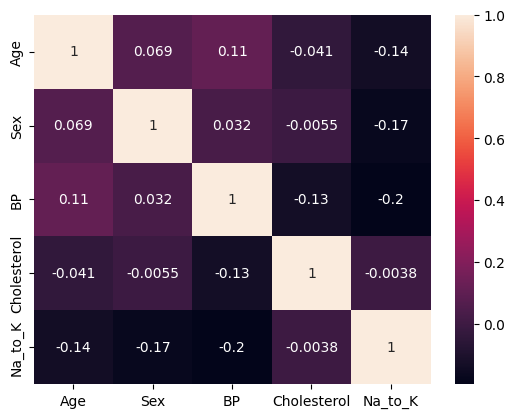

In [13]:
sns.heatmap(corr_x,annot=True)

In [14]:
y_train.value_counts(normalize=True)

Drug
0    0.45625
2    0.26875
3    0.11250
1    0.08125
4    0.08125
Name: proportion, dtype: float64

In [15]:
# Fit and apply SMOTE only on the training data
smote= SMOTE()

x_train_re, y_train_re = smote.fit_resample(x_train, y_train)


Training score for lre :  94.25
Testing score for lre :  90.0
Accuracy score for lre :  0.9
Classification Report for lre : 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       1.00      1.00      1.00         3
           2       0.92      1.00      0.96        11
           3       0.75      0.60      0.67         5
           4       0.60      1.00      0.75         3

    accuracy                           0.90        40
   macro avg       0.85      0.90      0.86        40
weighted avg       0.92      0.90      0.90        40

Confusion Matrix : 
 [[16  0  1  1  0]
 [ 0  3  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  3  2]
 [ 0  0  0  0  3]]


<Axes: >

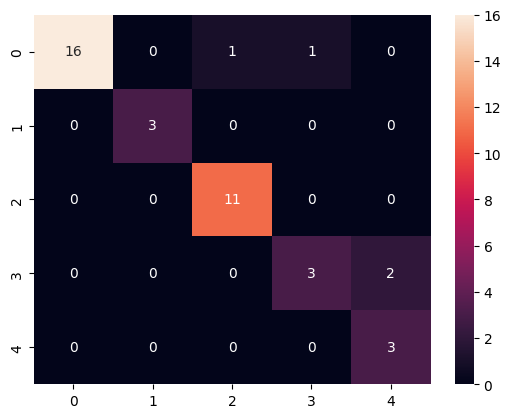

In [16]:
lre= LogisticRegression()

lre.fit(x_train_re,y_train_re)

y_pred = lre.predict(x_test)

print("Training score for lre : ",(lre.score(x_train_re,y_train_re)*100).round(2))
print("Testing score for lre : ",(lre.score(x_test,y_test)*100).round(2))

print("Accuracy score for lre : ",accuracy_score(y_test,y_pred))

print("Classification Report for lre : \n",classification_report(y_test,y_pred))

print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [17]:
with open("lre.pkl","wb") as f:
    pickle.dump(lre,f)

In [18]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
125,19,0,0,1,25.969
21,63,1,2,0,25.917
47,68,1,1,0,10.291
11,34,0,0,1,19.199
81,64,1,2,0,7.761
...,...,...,...,...,...
119,61,0,0,0,25.475
26,31,1,0,0,30.366
60,38,0,1,1,29.875
173,41,0,1,1,18.739


In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 125 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          160 non-null    int64  
 1   Sex          160 non-null    int32  
 2   BP           160 non-null    int32  
 3   Cholesterol  160 non-null    int32  
 4   Na_to_K      160 non-null    float64
dtypes: float64(1), int32(3), int64(1)
memory usage: 5.6 KB


In [29]:
with open("lre.pkl","rb") as f:
    model = pickle.load(f)

In [30]:
pred = model.predict([[19,	0	,0	,1	,25.969]])

pred

array([0], dtype=int64)